## Rice Classification Using CNN | Accuracy:0.99

### In this project, we want to make a model with good accuracy using CNN 

* __A Convolutional Neural Network (CNN) is a type of deep learning algorithm that is particularly well-suited for image recognition and processing tasks. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.

* __The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information. The output of the pooling layers is then passed through one or more fully connected layers, which are used to make a prediction or classify the image.

### Convolutional Neural Network Design :

* __The construction of a convolutional neural network is a multi-layered feed-forward neural network, made by assembling many unseen layers on top of each other in a particular order.
* __It is the sequential design that give permission to CNN to learn hierarchical attributes.
* __In CNN, some of them followed by grouping layers and hidden layers are typically convolutional layers followed by activation layers.
* __The pre-processing needed in a ConvNet is kindred to that of the related pattern of neurons in the human brain and was motivated by the organization of the Visual Cortex.

#### Now we demonstrate these layers:

* __Convolutional Operation__the inputed image gets ready for entrance to a **CNN** model. In this layer, we have kernel layer for reducing the dimension of matrix which created from the input image . In addition to have related operation images,we have **Activation Function** that is usually **ReLU** 

* __**Pooling**:Pooling layers reduce the dimensions of data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer. We have 3 types of **Pooling**: **Min** , **Max** and **Average**. This layer is for reducing the volume of input images, by removing non-important data,but we also have important points.

* __**Flatten**: In this layer we have a **Flatten Array** of input images, Because we want to give a specail location to each data in a matrix.

* __**Fully Connected (FC)**: Fully connected layers connect every neuron in one layer to every neuron in another layer. It is the same as a traditional multilayer perceptron neural network (MLP). The flattened matrix goes through a fully connected layer to classify the images.
#### Now, after the initial explanations, we go to model creating

<a id="import"></a>
# <p style="background:#2ab79f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase A: Importing Libraries</p>

In [ ]:
# !pip install opencv-python

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
# import cv2
import itertools

import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,Dropout
from keras.models import Model, Sequential
# from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import imageio
import matplotlib.image as img

import os 
import pathlib 

import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import imagenet_utils

<a id="import"></a>
# <p style="background:#25779f url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase B: Importing Datasets</p>

In [7]:
# path=os.path.join(os.getcwd(),'Rice_Image_Dataset')
path = pathlib.Path("/kaggle/input/rice-image-dataset/Rice_Image_Dataset")

In [8]:
arborio = list(path.glob('Arborio/*'))[:1000]
basmati = list(path.glob('Basmati/*'))[:1000]
ipsala = list(path.glob('Ipsala/*'))[:1000]
jasmine = list(path.glob('Jasmine/*'))[:1000]
karacadag = list(path.glob('Karacadag/*'))[:1000]

In [9]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}
rice_labels= {
    0: "Arborio",
    1: "Basmati",
    2: "Ipsala",
    3:"Jasmine",
    4:"Karacadag"}

<a id="import"></a>
# <p style="background:#2abccf url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase C: Visuallization</p>

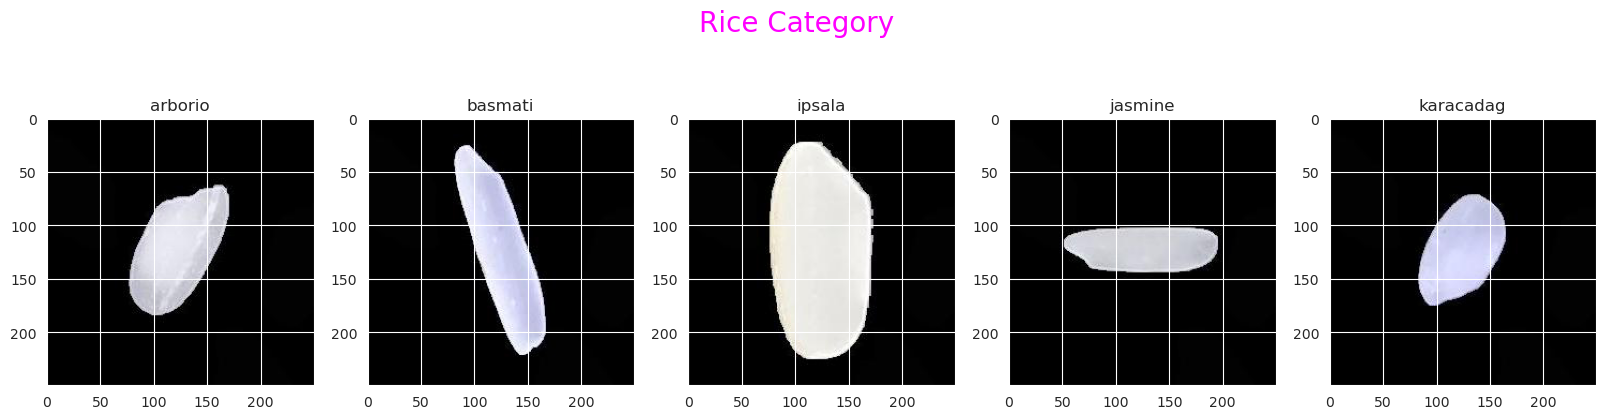

In [5]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category',color='magenta',fontsize=20)
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index,name in enumerate(list(data.keys())):
    ax[index].set_title(name)
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)


<a id="import"></a>
# <p style="background:#45b7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase D: Train & Test Definition</p>

In [6]:
train_gen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=train_gen.flow_from_directory("/kaggle/input/rice-image-dataset/Rice_Image_Dataset",target_size=(224,224),batch_size=32,class_mode='categorical',shuffle=True,subset='training')
test_data=train_gen.flow_from_directory("/kaggle/input/rice-image-dataset/Rice_Image_Dataset",target_size=(224,224),batch_size=1,shuffle=False,subset='validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


<a id="import"></a>
# <p style="background:#ffb7ff url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase E: Creating Simple Model</p>

In [8]:
cnn=keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(40,activation='relu'))
cnn.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn.add(keras.layers.Dense(units=5,activation='sigmoid'))

In [9]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 394272)            0         
                                                                 
 dense_2 (Dense)             (None, 40)                15770920  
                                                                 
 dropout_1 (Dropout)         (None, 40)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 205       
                                                      

In [10]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [11]:
cnn.fit(train_data,epochs=2,validation_data=test_data,shuffle=True)

Epoch 1/2
1875/1875 [==============================] - 505s 264ms/step - loss: 0.3527 - accuracy: 0.8912 - val_loss: 0.0997 - val_accuracy: 0.9667
Epoch 2/2
1875/1875 [==============================] - 233s 124ms/step - loss: 0.1073 - accuracy: 0.9596 - val_loss: 0.0482 - val_accuracy: 0.9847


In [13]:
def plot(c):
    plt.plot(c.history.history['accuracy'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_accuracy'],marker='*',color='green',markersize=10)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(c.history.history['loss'],marker='o',color='red',markersize=10)
    plt.plot(c.history.history['val_loss'],marker='*',color='green',markersize=10)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show()


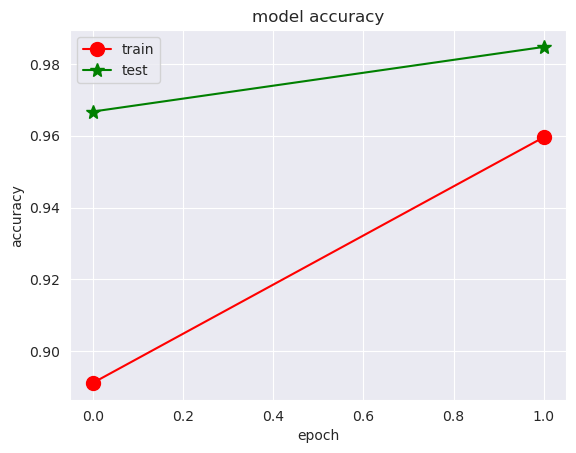

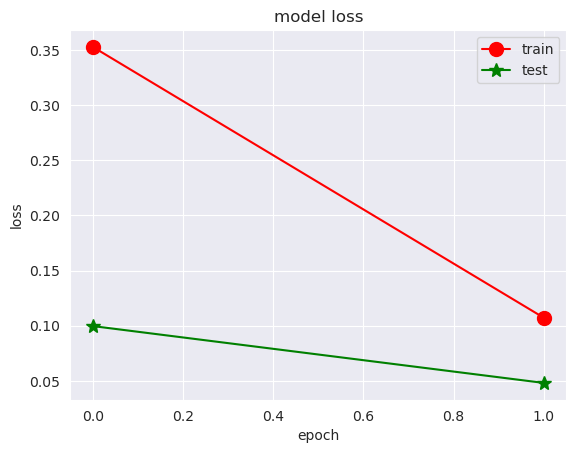

In [14]:
plot(cnn)

* __In the first epoch, **Accuracy** of **Train** is **0.955** and for **Test** is upper **0.98** . that shows us we should increase the value of **epoch**. On the other hand in the second epoch, the value of **test_Accuracy** is close to the **Train_Accurcay**
* __Beside, from the second plot we can understand this issue and finally we decide that increase the number of **Epochs**

<a id="import"></a>
# <p style="background:#ffbbaa url('pylogo.jpg') no-repeat; font-family:TimesNewRoman; font-size:100%; color:black; text-align:center; border-radius:20px 30px; width:80%; padding:30px">Phase E-1: Creating Second Model </p>

* __Here, we increase the number of **epochs** to have higher scores, but we can stop the process of running the model by **keras.callbacks.EarlyStopping**

* __A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc).

##### You can use callbacks to:

* __Write TensorBoard logs after every batch of training to monitor your metrics
* __Periodically save your model to disk
* __Do early stopping
* __Get a view on internal states and statistics of a model during training
* __...and more


* __we use **EarlyStopping** in our model for stopping the running after 10 times. You can assign the smaller value to this hyperparameter, but we want to run more for better showing.

In [15]:
cnn2=keras.models.Sequential()
cnn2.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                            padding='valid',activation='relu',input_shape=(224,224,3)))
cnn2.add(keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(45,activation='relu'))
cnn2.add(keras.layers.Dense(15,activation='relu'))
cnn2.add(keras.layers.Dropout(rate= 0.1, seed= 100))
cnn2.add(keras.layers.Dense(units=5,activation='sigmoid'))

In [16]:
cnn2.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [17]:
cnn2.fit(train_data,epochs=40,validation_data=test_data,shuffle=True,
         callbacks=keras.callbacks.EarlyStopping(monitor="val_loss",patience=10))

Epoch 1/40
1875/1875 [==============================] - 235s 124ms/step - loss: 0.1663 - accuracy: 0.9472 - val_loss: 0.1183 - val_accuracy: 0.9613
Epoch 2/40
1875/1875 [==============================] - 219s 117ms/step - loss: 0.0541 - accuracy: 0.9839 - val_loss: 0.0928 - val_accuracy: 0.9733
Epoch 3/40
1875/1875 [==============================] - 214s 114ms/step - loss: 0.0398 - accuracy: 0.9869 - val_loss: 0.0730 - val_accuracy: 0.9773
Epoch 4/40
1875/1875 [==============================] - 268s 143ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0343 - val_accuracy: 0.9902
Epoch 5/40
1875/1875 [==============================] - 240s 128ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0459 - val_accuracy: 0.9887
Epoch 6/40
1875/1875 [==============================] - 222s 118ms/step - loss: 0.0182 - accuracy: 0.9939 - val_loss: 0.0664 - val_accuracy: 0.9811
Epoch 7/40
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0147 - accuracy: 0.9952 - val_

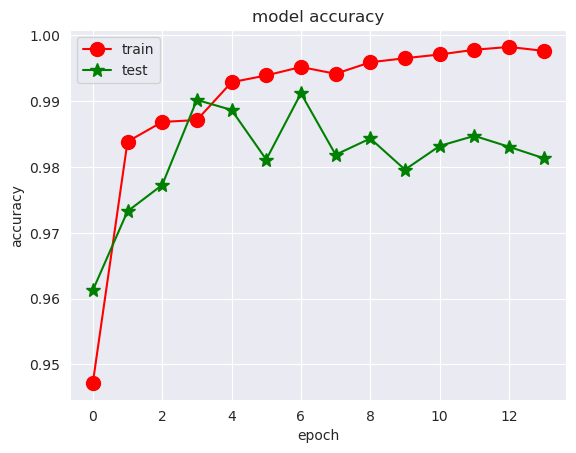

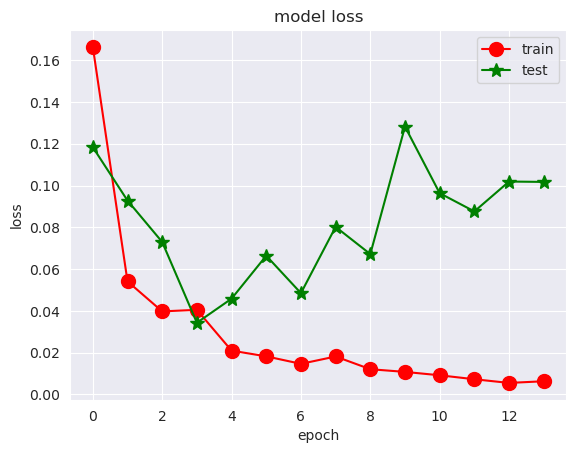

In [18]:
plot(cnn2)

* __After the model training, seeing the above chart, we conclude that the best **epoch** is **six** for our model, because in this amount, train and test are very close to each other and we have received a good score for the two.

In [19]:
y_pred = cnn2.predict(test_data)
main_y_pred = np.argmax(y_pred, axis=1)


15000/15000 [==============================] - 58s 4ms/step


In [20]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = cnn2.predict_generator(test_data, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [21]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

     Arborio       0.98      0.97      0.98      3000
     Basmati       0.96      0.99      0.98      3000
      Ipsala       0.99      1.00      1.00      3000
     Jasmine       0.99      0.95      0.97      3000
   Karacadag       0.98      0.99      0.98      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000



array([[2925,    0,    7,    4,   64],
       [   0, 2964,    1,   35,    0],
       [   0,    0, 3000,    0,    0],
       [  24,  110,   11, 2854,    1],
       [  29,    0,    0,    0, 2971]])

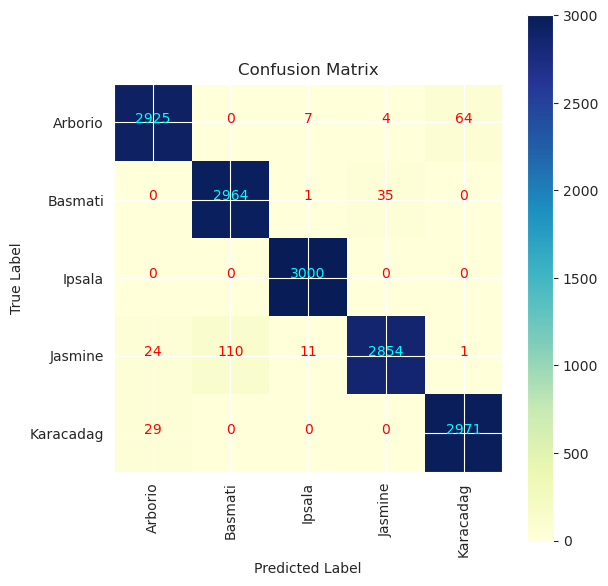

In [22]:
cm = confusion_matrix(test_data.classes, predicted_classes)
d1=test_data.class_indices
classes = list(d1.keys())
cmap= plt.cm.YlGnBu
plt.figure(figsize= (6, 6))
plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
plt.title('Confusion Matrix')
plt.colorbar(shrink=True)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 90)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'aqua' if cm[i, j] > thresh else 'red')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
cm



In [23]:

train_score = cnn2.evaluate(train_data, verbose= 1)
test_score = cnn2.evaluate(test_data, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

15000/15000 [==============================] - 76s 5ms/step - loss: 0.1017 - accuracy: 0.9813
Train Loss:  0.002331344410777092
Train Accuracy:  0.9991999864578247
*****************************
Test Loss:  0.10172705352306366
Test Accuracy:  0.981333315372467


* __Well, in according to the above plot and **Confusion_Matirx** results, we found that our model is good because:

* __the **Accuracy** of **Train** is **0.999** and the **loss** value of it is **0.001** .

* __the **Accuracy** of **Test** is **0.99** and the **loss** value of it is **0.064** and these values are great

* __So that we dont need use **ResNet50** and the other well-known Architecture for this dataset.